<h1 align="center"> ANALYSIS OF THE SHOW F.R.I.E.N.D.S</h1>


![Friends_Cast_image](friends-cast_image.webp)

### EXECUTIVE SUMMARY

'Friends' is a popular 90's TV show about six friends - Rachel, Monica, Chandler, Ross, Joey, and Phoebe. I found a dataset on [Kaggle.com](https://www.kaggle.com/) containing exciting information about this show. I found many interesting facts about this show by exploring this dataset.
Some of these are as follows:
- Multiple writers and directors have contributed to the show. David Schwimmer, who played Ross's character, also directed 10 episodes.
- Each episode of this show has at least a million views from the US audience. 
- The average IMDB rating of the show is 8.4.
- Season 2 out of the ten seasons of FRIENDS was the most popular in terms of viewership 
This notebook covers some more interesting findings about this show and answers three research questions briefly. 





### RESEARCH QUESTIONS

1. Are all main characters given equal importance?

2. Did titles with character names in them attract more views?

3. Did a particular season do better than the others based on IMDB ratings?

[Click here to jump to the Solutions](#ANSWERING-THE-RESEARCH-QUESTIONS)

### THE DATA

We are going to take three datasets and merge them for our analysis.

Two datasets were taken from Kaggle and modified to make a total of three datasets.

This is done to satisfy the criterias described by Prof.

[Click here](https://www.kaggle.com/datasets/bcruise/friends-episode-data) to see the original two datasets.


In [5]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#Loading Dataset 1 - This dataset contains info about all the FRIENDS episodes
df1 = pd.read_csv('friends_episodes.csv')
#Viewing top 5 rows of Dataset 1
df1.head(3)

,season,episode_num_in_season,title,directed_by,written_by,original_air_date,prod_code
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,9/22/1994,456650
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/1994,456652
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/1994,456651


In [7]:
#Loading Dataset 2 - This dataset contains IMDB ratings for all the FRIENDS episodes
df2 = pd.read_csv('friends_imdb.csv')
#Viewing top 5 rows of Dataset 2
df2.head(3)

,season,episode_num_in_season,title,imdb_rating,desc
0,1,1,The One Where Monica Gets a Roommate,8.3,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,8.0,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,8.1,Monica becomes irritated when everyone likes h...


In [8]:
#Loading Dataset 3 - This dataset contains info about how many people in the US watched each episode
df3 = pd.read_csv('friends_viewers.csv')
#Viewing top 5 rows of Dataset 3
df3.head(3)

,season,episode_num_in_season,title,us_viewers
0,1,1,The One Where Monica Gets a Roommate,21500000
1,1,2,The One with the Sonogram at the End,20200000
2,1,3,The One with the Thumb,19500000


Let's check the number of rows in each dataset.

In [25]:
df1.count()

season                   236
episode_num_in_season    236
title                    236
directed_by              236
written_by               236
original_air_date        236
prod_code                236
dtype: int64

In [26]:
df2.count()

season                   235
episode_num_in_season    235
title                    235
imdb_rating              235
desc                     235
dtype: int64

In [27]:
df3.count()

season                   236
episode_num_in_season    236
title                    236
us_viewers               236
dtype: int64

It is noted that dataset df2 has one less row of information.

To find out which row of data is missing in dataset df2, let's display the number of episodes grouped by season for each dataset.

In [6]:
print("Episodes in each season for df1")
df1.groupby(['season']).size()

Episodes in each season for df1


season
1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
dtype: int64

In [36]:
print("Episodes in each season for df2")
df2.groupby(['season']).size()

Episodes in each season for df2


season
1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    17
dtype: int64

In [ ]:
print("Episodes in each season for df3")
df3.groupby(['season']).size()

Episodes in each season for df3


season
1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
dtype: int64

Note that df2 is missing details about an episode in season 10.

To find out which episode is missing, let's print all the episodes from season 10.

In [9]:
#Season 10 - All episodes from df1 
Episodes_df1 = df1.loc[df1.season==10]
Episodes_df1

,season,episode_num_in_season,title,directed_by,written_by,original_air_date,prod_code
218,10,1,The One After Joey and Rachel Kiss,Kevin S. Bright,Andrew Reich & Ted Cohen,9/25/2003,176251
219,10,2,The One Where Ross Is Fine,Ben Weiss,Sherry Bilsing-Graham & Ellen Plummer,10/2/2003,176252
220,10,3,The One with Ross's Tan,Gary Halvorson,Brian Buckner,10/9/2003,176253
221,10,4,The One with the Cake,Gary Halvorson,Robert Carlock,10/23/2003,176254
222,10,5,The One Where Rachel's Sister Babysits,Roger Christiansen,Dana Klein Borkow,10/30/2003,176255
223,10,6,The One with Ross' Grant,Ben Weiss,Sebastian Jones,11/6/2003,176256
224,10,7,The One with the Home Study,Kevin S. Bright,Mark Kunerth,11/13/2003,176257
225,10,8,The One with the Late Thanksgiving,Gary Halvorson,Shana Goldberg-Meehan,11/20/2003,176259
226,10,9,The One with the Birth Mother,David Schwimmer,Scott Silveri,1/8/2004,176258
227,10,10,The One Where Chandler Gets Caught,Gary Halvorson,Doty Abrams,1/15/2004,176268


In [10]:
#Season 10 - All episodes from df2 
Episodes_df2 = df2.loc[df2.season==10]
Episodes_df2

,season,episode_num_in_season,title,imdb_rating,desc
218,10,1,The One After Joey and Rachel Kiss,8.5,Joey and Ross both attempt to come clean to ea...
219,10,2,The One Where Ross Is Fine,8.8,Rachel and Joey fear for Ross's state of mind ...
220,10,3,The One with Ross's Tan,8.8,Ross goes to a tanning salon but fails to foll...
221,10,4,The One with the Cake,8.3,"On Emma's first birthday, Ross and Rachel conv..."
222,10,5,The One Where Rachel's Sister Babysits,8.2,Rachel's sister Amy comes to visit and moves i...
223,10,6,The One with Ross' Grant,8.2,Ross applies for a paleontology grant and find...
224,10,7,The One with the Home Study,8.3,Monica and Chandler nervously prepare for a vi...
225,10,8,The One with the Late Thanksgiving,8.9,"Joey, Ross, Rachel and Phoebe convince Monica ..."
226,10,9,The One with the Birth Mother,8.6,"Nervous and excited, Monica and Chandler trave..."
227,10,10,The One Where Chandler Gets Caught,8.0,Chandler and Monica have decided they want to ...


In [11]:
#Season 10 - All episodes from df3
Episodes_df3 = df3.loc[df3.season==10]
Episodes_df3

,season,episode_num_in_season,title,us_viewers
218,10,1,The One After Joey and Rachel Kiss,24540000
219,10,2,The One Where Ross Is Fine,22370000
220,10,3,The One with Ross's Tan,21870000
221,10,4,The One with the Cake,18760000
222,10,5,The One Where Rachel's Sister Babysits,19370000
223,10,6,The One with Ross' Grant,20370000
224,10,7,The One with the Home Study,20210000
225,10,8,The One with the Late Thanksgiving,20660000
226,10,9,The One with the Birth Mother,25480000
227,10,10,The One Where Chandler Gets Caught,26680000


The episode title **"The Last One"** is repeated in df1 and df3 and is not giving us any new info.

Let's delete this row of information because its repetitive.

In [12]:
#Season 10 - Drop last row from df1
Drop_last_row_df1 = df1.drop(235)
Drop_last_row_df1.tail(3)

,season,episode_num_in_season,title,directed_by,written_by,original_air_date,prod_code
232,10,15,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,4/22/2004,176264
233,10,16,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,4/29/2004,176265
234,10,17,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,5/6/2004,176266


In [13]:
#Season 10 - Drop last row from df3
Drop_last_row_df3 = df3.drop(235)
Drop_last_row_df3.tail(3)

,season,episode_num_in_season,title,us_viewers
232,10,15,The One Where Estelle Dies,22640000
233,10,16,The One with Rachel's Going Away Party,24510000
234,10,17,The Last One,52460000


### DATA MERGER

We will use outer join for the merging process to ensure we have all the columns we need. 

We can delete the additional columns later on.

In [14]:
# Merging datasets Drop_last_row_df1 and df2
Merge_1 = pd.merge(Drop_last_row_df1, df2, on='title', how='outer')
Merge_1.head(3)

,season_x,episode_num_in_season_x,title,directed_by,written_by,original_air_date,prod_code,season_y,episode_num_in_season_y,imdb_rating,desc
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,9/22/1994,456650,1,1,8.3,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/1994,456652,1,2,8.0,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/1994,456651,1,3,8.1,Monica becomes irritated when everyone likes h...


In [15]:
# Merging datasets Merge_1 and Drop_last_row_df3
Merge_2 = pd.merge(Merge_1, Drop_last_row_df3, on='title', how='outer')
Merge_2.head(3)

,season_x,episode_num_in_season_x,title,directed_by,written_by,original_air_date,prod_code,season_y,episode_num_in_season_y,imdb_rating,desc,season,episode_num_in_season,us_viewers
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,9/22/1994,456650,1,1,8.3,"Monica and the gang introduce Rachel to the ""r...",1,1,21500000
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,9/29/1994,456652,1,2,8.0,Ross finds out his ex-wife is pregnant. Rachel...,1,2,20200000
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,10/6/1994,456651,1,3,8.1,Monica becomes irritated when everyone likes h...,1,3,19500000


In [16]:
#Checking the columns of the merged dataset
print(Merge_2.columns)

Index(['season_x', 'episode_num_in_season_x', 'title', 'directed_by',
       'written_by', 'original_air_date', 'prod_code', 'season_y',
       'episode_num_in_season_y', 'imdb_rating', 'desc', 'season',
       'episode_num_in_season', 'us_viewers'],
      dtype='object')


We have successfully merged the three datasets but have a few repeating columns and additional columns that we do not need for our analysis.

Therefore we will be deleting these columns.

In [17]:
#Dropping unwanted columns
Friends_df = Merge_2.drop(['original_air_date', 'prod_code','season_y','episode_num_in_season_y','season','episode_num_in_season'], axis=1)
Friends_df.head(3)

,season_x,episode_num_in_season_x,title,directed_by,written_by,imdb_rating,desc,us_viewers
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,8.3,"Monica and the gang introduce Rachel to the ""r...",21500000
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,8.0,Ross finds out his ex-wife is pregnant. Rachel...,20200000
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,8.1,Monica becomes irritated when everyone likes h...,19500000


In [15]:
#Rename column season_x to season and episode_num_in_season_x to episode_num_in_season

Friends_df.rename(columns={"season_x":"season"},inplace=True)
Friends_df.rename(columns={"episode_num_in_season_x":"episode_num_in_season"},inplace=True)
Friends_df.head(3)

,season,episode_num_in_season,title,directed_by,written_by,imdb_rating,desc,us_viewers
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,8.3,"Monica and the gang introduce Rachel to the ""r...",21500000
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,8.0,Ross finds out his ex-wife is pregnant. Rachel...,20200000
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,8.1,Monica becomes irritated when everyone likes h...,19500000


In [16]:
#Checking for nulls 
Friends_df.isnull().sum()

season                   0
episode_num_in_season    0
title                    0
directed_by              0
written_by               0
imdb_rating              0
desc                     0
us_viewers               0
dtype: int64

In [78]:
#Checking datatypes
Friends_df.dtypes

season                     int64
episode_num_in_season      int64
title                     object
directed_by               object
written_by                object
imdb_rating              float64
desc                      object
us_viewers                 int64
dtype: object

In [17]:
#Checking if we have two identical rows
Duplicate = Friends_df.duplicated().sum()
print(f"We have {Duplicate} duplicate rows in our final dataframe Friends_df")

We have 0 duplicate rows in our final dataframe Friends_df


### DESCRIBING THE COLUMNS OF THE FINAL DATAFRAME

The final dataframe has 8 Columns.

We have for four numerical variables and four categorical variables.

Numerical variables - season, episode_num_in_season, imdb_rating, us_viewers

Categorical variables - title, directed_by, written_by, desc

The description of these 8 Columns are as follows:



**No.**|**Column Name**|**Description**|**Example**
:-----:|:-----:|:-----:|:-----:
1|season                   |This column holds the season number. It can range anywhere between 1 to 10 because FRIENDS had 10 seasons.|1
2|episode_num_in_season    |This column holds the episode number associated with the respective season.|5
3|title                    |This column holds the title name of each episode.|The One Where Monica Gets a Roommate
4|directed_by              |This column holds the name of the director who directed that episode.|James Burrows
5|written_by               |This column holds the names of the writers who wrote the script of that episode.|David Crane & Marta Kauffman
6|imdb_rating              |This column holds the IMDB rating of an episode and can have a decimal value.|8.3
7|desc                     |This column gives a brief idea about the episode.|The gang throws Rachel a goodbye party, during which she says goodbye to everybody individually.
8|us_viewers               |This columns tells us how many US viewers watched a particular episode|21500000
 

### DATA EXPLORATION

Summarizing Quantitative and Qualitative data.

In [188]:
#Quantitative Columns 
pd.set_option('float_format', '{:f}'.format)
Friends_df[['season','episode_num_in_season','imdb_rating', 'us_viewers']].describe().loc[['count','min','max']]

,season,episode_num_in_season,imdb_rating,us_viewers
count,235.000000,235.000000,235.000000,235.000000
min,1.000000,1.000000,7.100000,15650000.000000
max,10.000000,25.000000,9.700000,52900000.000000


In [190]:
#Qualitative Columns 
Friends_df[['title','desc','directed_by','written_by']].describe()

,title,desc,directed_by,written_by
count,235,235,235,235
unique,235,235,29,96
top,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",Gary Halvorson,Andrew Reich & Ted Cohen
freq,1,1,54,12


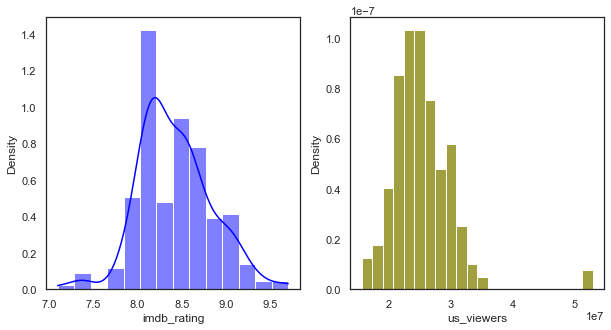

In [63]:
#Let's check the distribution of IMDB Ratings and US_viewers data 

sns.set(style = "white")
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(Friends_df['imdb_rating'], color="blue", kde=True, stat="density", ax=axs[0])
sns.histplot(Friends_df['us_viewers'], kde=False, color="olive", stat="density", ax=axs[1])

plt.show()

In [19]:
# Top 10 episodes based on IMDB Ratings
Friends_df[['season', 'episode_num_in_season','title', 'imdb_rating']].sort_values(by='imdb_rating', ascending=False).head(5)



,season,episode_num_in_season,title,imdb_rating
234,10,17,The Last One,9.7
110,5,14,The One Where Everybody Finds Out,9.7
84,4,12,The One with the Embryos,9.5
37,2,14,The One with the Prom Video,9.4
145,6,25,The One with the Proposal: Part 2,9.3


In [20]:
#Binning IMDB Ratings
group_names = ['Episodes with IMDB Ratings 7.0 and above', 'Episodes with IMDB Ratings 8.0 and above', 'Episodes with IMDB Ratings 9.0 and above']
IMDB_ratings = Friends_df.imdb_rating
Bins = [7, 7.9, 8.9, 10]
Category = pd.cut(IMDB_ratings, Bins, labels=group_names)
Counts = pd.value_counts(Category)
Counts.sort_index()


Episodes with IMDB Ratings 7.0 and above     16
Episodes with IMDB Ratings 8.0 and above    191
Episodes with IMDB Ratings 9.0 and above     28
Name: imdb_rating, dtype: int64

In [325]:
# Top 10 episodes based on Viewership

Friends_df[['season', 'episode_num_in_season','title', 'us_viewers']].sort_values(by='us_viewers', ascending=False).head(5)


,season,episode_num_in_season,title,us_viewers
35,2,12,The One After the Superbowl: Part 1,52900000
36,2,13,The One After the Superbowl: Part 2,52900000
234,10,17,The Last One,52460000
193,8,24,The One Where Rachel Has a Baby: Part 2,34910000
192,8,23,The One Where Rachel Has a Baby: Part 1,34910000


From the Qualitative data description, we know 29 unique directors directed various FRIENDS episodes.

Let's find out how many episodes were directed by each director.

Text(0.5, 1.0, 'Director-Episode Count Graph')

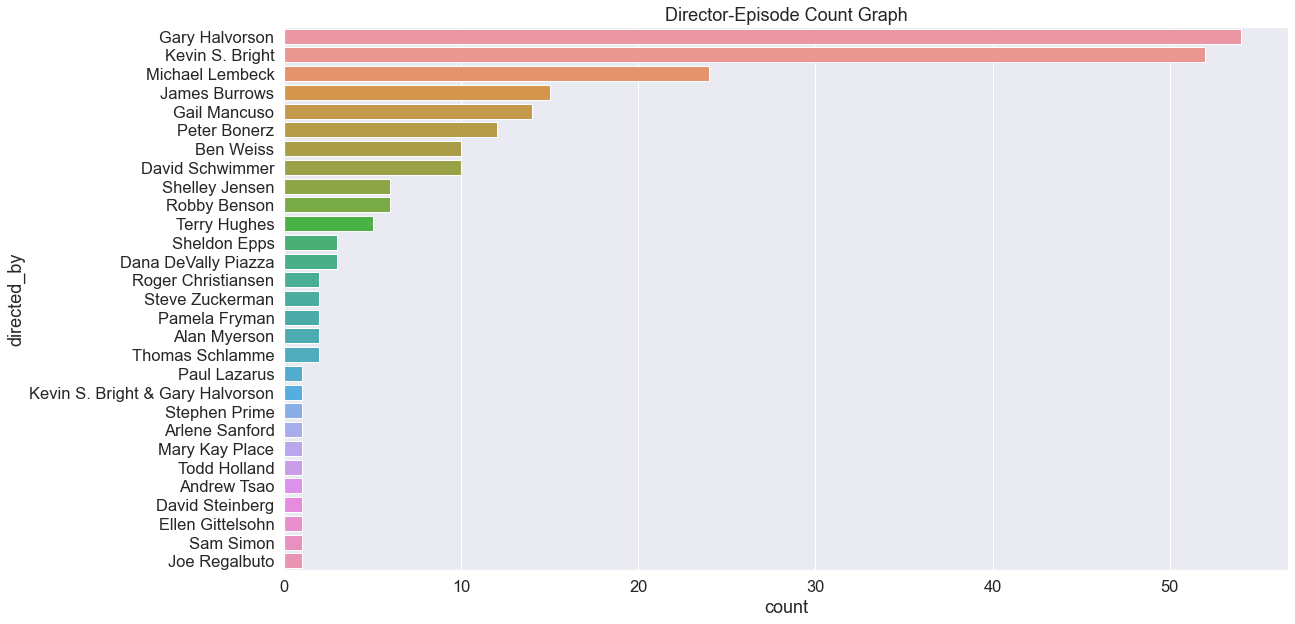

In [277]:
# Director-Episode count graph
plt.figure(figsize=(18,10)) 
sns.set(font_scale=1.5)
ax = sns.countplot(data=Friends_df, y = 'directed_by', order = Friends_df['directed_by'].value_counts().index)
plt.title('Director-Episode Count Graph', fontsize=18)


From the Qualitative data description, we know 96 unique writers wrote various FRIENDS episodes.

Let's find out who were the top 20 writers.

Text(0.5, 1.0, 'Top 20 writers')

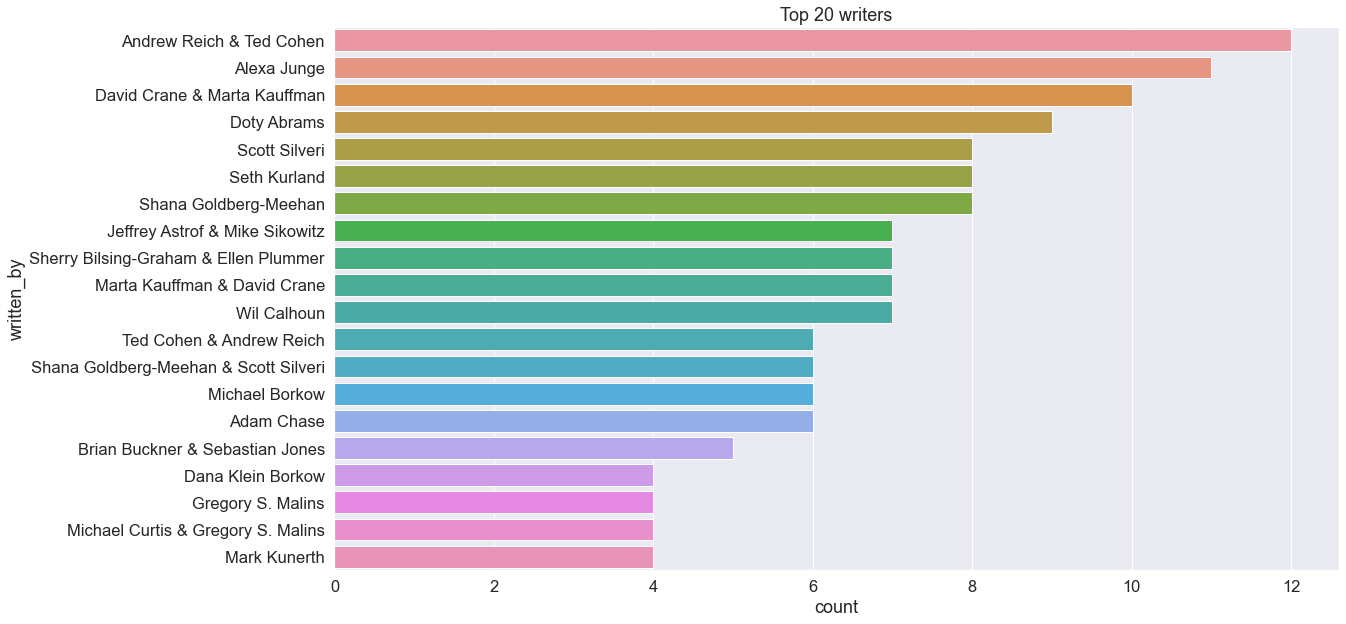

In [345]:
# Writer-Episode top 20 count graph
plt.figure(figsize=(18,10)) 
sns.set(font_scale=1.5)
#sb.countplot(x='Gene',data=training_var,order=pd.value_counts(training_var['Gene']).iloc[:10].index)
ax = sns.countplot(data=Friends_df, y = 'written_by', order = Friends_df['written_by'].value_counts().iloc[:20].index)
#ax = sns.countplot(data=Friends_df, y = 'written_by', order = Friends_df['written_by'].value_counts().index)

plt.title('Top 20 writers', fontsize=18)

When you look up the show details online, it usually says created by David Crane and Marta Kauffman.

Note they are in the third position in the graph above. 

In [28]:
# Season and Viewership relation
Season_viewership = Friends_df[['us_viewers']].groupby(Friends_df.season).mean().add_prefix('mean_')


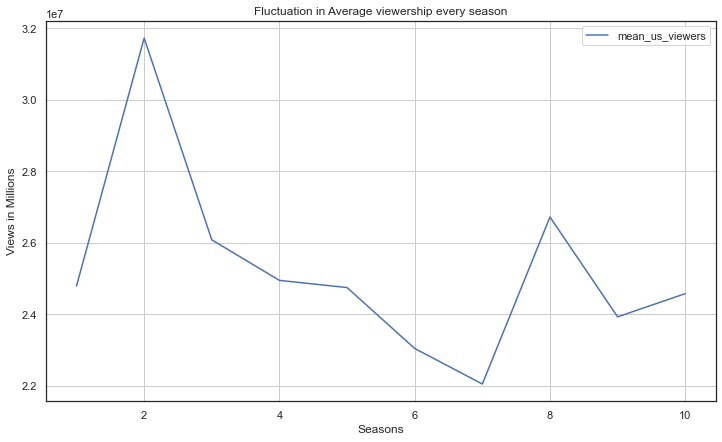

In [69]:
plt.rcParams["figure.figsize"] = (12,7)
ax = Season_viewership.plot(title='Fluctuation in Average viewership every season').set(ylabel='Views in Millions', xlabel='Seasons')
plt.grid(True)

I plotted a line chart considering seasons were released over time.

It is interesting to see how viewership dropped after the second season.

**Learnings from Data Exploration:**

- The show 'FRIENDS' has ten seasons and 235 episodes.

- Many people worked behind the camera to make FRIENDS successful.

- Twenty-nine directors directed the show in total.

- Out of all these 29 directors, Gary Halvorson directed the maximum number of episodes which is 54.

- David Schwimmer, who played Ross's character, also directed 10 episodes.

- The average IMDB rating of the show is 8.4.

- Twenty-eight episodes did exceptionally well, with a rating of 9.0 and above.

- Each episode has at least a million of views in the US itself. 

- We know the top 5 episodes based on IMDB Ratings and Viewership.

- Season 2 had the highest average viewership.

- Ninety-six unique combinations of writers have written a total of 235 episodes.

- Andrew Reich & Ted Cohen have written most of the episodes.

### ANSWERING THE RESEARCH QUESTIONS

#### Research Question 1 - Are all main characters given equal importance?

Friends is a TV show about six friends. Every episode of this TV show mostly involved all six characters.

Let's assume that the characters mentioned in the episode's description were the main leads for that episode. 

Based on this assumption, let's recode variables to find out how many times a character was mentioned in the description column of this dataframe.

This should help us to answer the first research question.

In [38]:
#Based on the leading character names in the desc column, we will create new columns for each character
#To do this lets create a copy of dataframe friends_df
friends_recoding = Friends_df
friends_recoding.head(3)

,season,episode_num_in_season,title,directed_by,written_by,imdb_rating,desc,us_viewers
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,8.3,"Monica and the gang introduce Rachel to the ""r...",21500000
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,8.0,Ross finds out his ex-wife is pregnant. Rachel...,20200000
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,8.1,Monica becomes irritated when everyone likes h...,19500000


In [45]:
#Recoding and creating dummy variables - Looking for Character Rachel in desc and creating a new column 

friends_recoding['Rachel'] = np.where(friends_recoding['desc'].str.contains('Rachel'), 1, 0)
    
friends_recoding.head(3)

,season,episode_num_in_season,title,directed_by,written_by,imdb_rating,desc,us_viewers,Rachel,Ross,Joey,Chandler,Monica,Phoebe
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,8.3,"Monica and the gang introduce Rachel to the ""r...",21500000,1,0,0,0,1,0
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,8.0,Ross finds out his ex-wife is pregnant. Rachel...,20200000,1,1,0,0,1,0
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,8.1,Monica becomes irritated when everyone likes h...,19500000,0,0,0,1,1,1


In [43]:
#Lets do the same for all other characters using a loop
character_names = ['Ross', 'Joey', 'Chandler', 'Monica', 'Phoebe']

for char_name in character_names:
    friends_recoding[char_name] = np.where(friends_recoding['desc'].str.contains(char_name), 1, 0)
    
friends_recoding.head(3)

,season,episode_num_in_season,title,directed_by,written_by,imdb_rating,desc,us_viewers,Rachel,Ross,Joey,Chandler,Monica,Phoebe
0,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,8.3,"Monica and the gang introduce Rachel to the ""r...",21500000,1,0,0,0,1,0
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,8.0,Ross finds out his ex-wife is pregnant. Rachel...,20200000,1,1,0,0,1,0
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,8.1,Monica becomes irritated when everyone likes h...,19500000,0,0,0,1,1,1


In [46]:
# Downloading the final datafram 
file_name = 'final version file.xlsx'

# saving the excel
Friends_df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


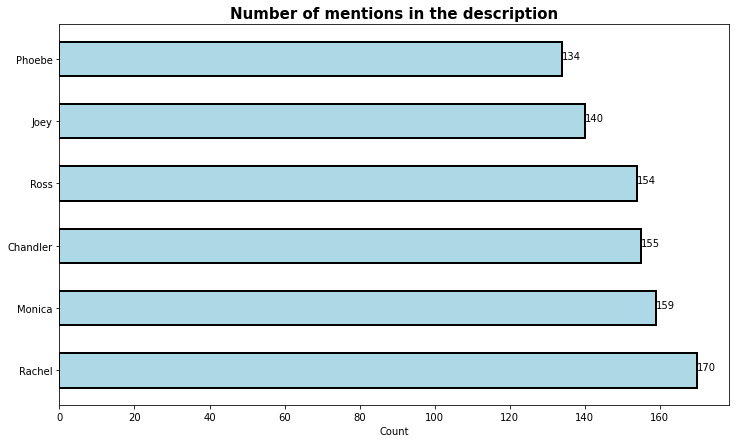

In [54]:
# To answer this question let's take the sum of all the newly recoded columns and plot a bar graph
y=[friends_recoding.Rachel.sum(),
   friends_recoding.Monica.sum(),
   friends_recoding.Chandler.sum(),
   friends_recoding.Ross.sum(),
   friends_recoding.Joey.sum(),
   friends_recoding.Phoebe.sum()
  ]

n=len(y)
x = np.arange(n)
plt.subplots(figsize =(12, 7))
plt.title("Number of mentions in the description", fontweight ='bold', fontsize = 15)
plt.barh(x,y, height=0.55,color='lightblue', edgecolor='black',linewidth=2)
plt.xlabel('Count')
plt.yticks(x,['Rachel','Monica','Chandler','Ross','Joey','Phoebe'],color='black')

# To display sum values
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.show()

**Answering research question 1**

Looking at the graph above, we can say that not all characters were equally important.

It looks like **Rachel** was given the most importance, and **Phoebe** was given the least importance.

#### Research Question 2 - Did titles with character names in them attract more views?

To answer this question, let's extract the titles where a character's name is mentioned and take the average of the corresponding us viewers.

Then let's extract the titles where a character's name is not mentioned and take the average of the corresponding us viewers.

And Compare both the values.

In [31]:
#Lets extract the columns title and views
Friends_title_and_views = friends_recoding[['title','us_viewers']]
Friends_title_and_views.head(3)

,title,us_viewers
0,The One Where Monica Gets a Roommate,21500000
1,The One with the Sonogram at the End,20200000
2,The One with the Thumb,19500000


In [32]:
# Lets confirm we have got all the rows
Friends_title_and_views.count()

title         235
us_viewers    235
dtype: int64

In [33]:
#Now lets extract those rows that have a character's name in its title
contain_values = Friends_title_and_views[Friends_title_and_views['title'].str.contains('Rachel|Monica|Chandler|Ross|Joey|Phoebe')]
contain_values

,title,us_viewers
0,The One Where Monica Gets a Roommate,21500000
20,The One with the Fake Monica,28400000
23,The One Where Rachel Finds Out,31300000
24,The One with Ross's New Girlfriend,32100000
27,The One with Phoebe's Husband,28100000
...,...,...
223,The One with Ross' Grant,20370000
227,The One Where Chandler Gets Caught,26680000
229,The One with Phoebe's Wedding,25900000
230,The One Where Joey Speaks French,24270000


So now we know that we have 88 out of 235 titles that have a character's name in it

In [34]:
# Lets get the average of the "us_viewers" column for these 88 titles.
AverageViewsWith_CharName_inTitle = contain_values.us_viewers.mean()
print(f"The average number of US viewers who viewed the episodes when a Character's name was present in the title is \n {round(AverageViewsWith_CharName_inTitle)}")

The average number of US viewers who viewed the episodes when a Character's name was present in the title is 
 24869432


In [35]:
#Now lets extract those rows that DO NOT have a character's name in its title
Do_not_contain_values = Friends_title_and_views[~Friends_title_and_views['title'].str.contains('Rachel|Monica|Chandler|Ross|Joey|Phoebe')]
Do_not_contain_values

,title,us_viewers
1,The One with the Sonogram at the End,20200000
2,The One with the Thumb,19500000
3,The One with George Stephanopoulos,19700000
4,The One with the East German Laundry Detergent,18600000
5,The One with the Butt,18200000
...,...,...
226,The One with the Birth Mother,25480000
228,The One Where the Stripper Cries,24910000
231,The One with Princess Consuela,22820000
232,The One Where Estelle Dies,22640000


We have 147 out of 235 titles that DO NOT have a character's name in it.

In [41]:
# Lets get the average of the "us_viewers" column for these 147 titles.
AverageViewsWith_CharName_NOTinTitle = Do_not_contain_values.us_viewers.mean()
print(f"The average number of US viewers who viewed the episodes when a Character's name was NOT present in the \n title is {round(AverageViewsWith_CharName_NOTinTitle)}")

The average number of US viewers who viewed the episodes when a Character's name was NOT present in the 
 title is 25518776


([<matplotlib.patches.Wedge at 0x21742e12fd0>,
 [Text(0.024289428723097157, 1.1997541513378087, 'Avg US viewers'),
  Text(-0.02226520669450574, -1.0997746408109488, 'Avg US viewers')])

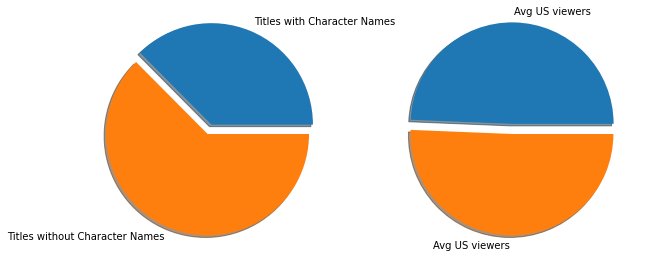

In [55]:
#Let's plot all this information in a pie chart

# To create both the pie charts in the same row
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

# Plot 1
y = np.array([88, 147])
mylabels = ['Titles with Character Names', 'Titles without Character Names']
myexplode = [0.1, 0]
ax1.pie(y, labels = mylabels, explode = myexplode, shadow = True)

# Plot 2
y = np.array([24869432, 25518776])
mylabels = ['Avg US viewers', 'Avg US viewers']
myexplode = [0.1, 0]
ax2.pie(y, labels = mylabels, explode = myexplode, shadow = True)

In [334]:
#Answering research question 2
print("\u001b[1m Answering research question 2\u001b[0m\n")
if AverageViewsWith_CharName_NOTinTitle > AverageViewsWith_CharName_inTitle:
    print("Titles with character names did not attract more views")
else:
    print("Titles with character names attracted more views?")

 Answering research question 2

Titles with character names did not attract more views


#### Research Question 3 - Did a particular season do better than the others based on IMDB ratings?

In [47]:
#Let's extract the season, episode_num_in_season and imdb_rating columns from the dataframe
season_imdb = friends_recoding[['season','episode_num_in_season','imdb_rating']]


In [58]:
# creating a cross tab to see the above data in a tabular format
crosstab_season_imdb = pd.crosstab(season_imdb.season,season_imdb.episode_num_in_season, values = season_imdb.imdb_rating, aggfunc='mean')
crosstab_season_imdb


episode_num_in_season,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
season,,,,,,,,,,,,,,,,,,,,,
1,8.3,8.0,8.1,8.1,8.4,8.1,9.0,8.1,8.2,8.0,...,8.1,8.4,8.8,8.1,7.8,7.8,8.3,8.7,8.9,NaN
2,8.5,8.2,8.3,7.9,8.2,8.6,9.0,8.5,7.9,8.0,...,8.6,8.3,8.4,8.5,8.1,8.1,9.0,8.0,8.2,NaN
3,8.4,9.0,8.0,8.0,8.1,9.1,8.3,8.3,9.0,8.1,...,9.1,8.3,8.4,8.1,8.1,8.7,8.2,8.0,8.1,8.8
4,9.1,8.0,8.5,8.2,8.4,8.5,8.7,9.1,7.9,8.0,...,8.2,8.6,8.2,8.7,8.5,7.1,8.5,8.7,9.2,NaN
5,8.9,9.0,8.8,8.2,8.7,8.0,8.3,9.1,9.1,8.1,...,8.6,8.5,7.9,8.7,8.2,8.4,8.2,8.8,9.1,NaN
6,8.7,8.2,8.1,8.5,8.1,8.5,8.3,8.5,9.2,8.6,...,8.5,9.1,8.3,8.3,7.3,8.6,9.0,8.6,8.7,9.3
7,8.4,8.3,8.1,8.1,8.0,8.9,8.5,8.2,8.1,8.5,...,8.7,8.3,8.4,8.7,8.3,7.4,8.3,8.9,9.2,NaN
8,8.7,9.1,8.7,9.3,8.1,8.5,7.8,8.7,9.3,8.0,...,8.2,8.0,8.2,7.4,8.2,8.1,8.3,8.8,8.9,NaN
9,8.6,8.5,8.2,8.1,8.5,8.3,8.6,8.8,8.1,7.4,...,8.2,8.4,8.6,8.1,8.2,8.2,7.8,8.4,8.6,NaN


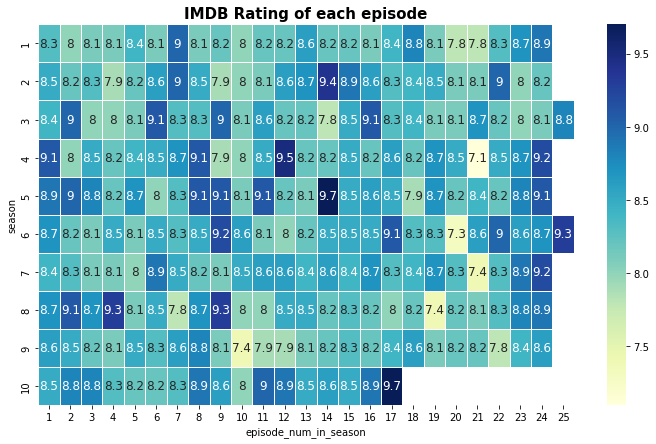

In [59]:
#Let's plot a heat map to see how each episode performed in each season
plt.subplots(figsize=(12,7))
plt.title('IMDB Rating of each episode', fontweight ='bold', fontsize = 15)
ax = sns.heatmap(crosstab_season_imdb, annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":12})


In [41]:
#Average IMDB rating for each season
best_season = friends_recoding.groupby('season')['imdb_rating'].agg(['mean'])


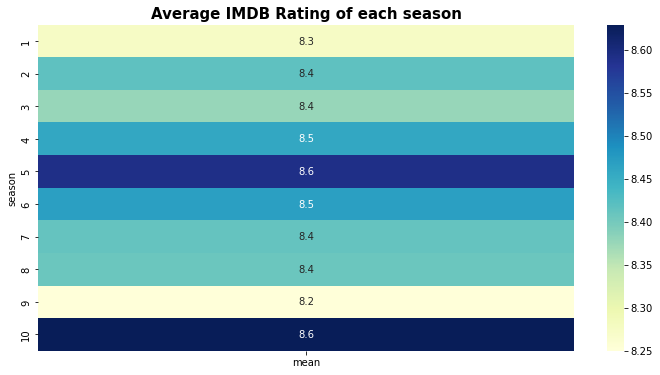

In [56]:
plt.subplots(figsize=(12,6))
plt.title('Average IMDB Rating of each season', fontweight ='bold', fontsize = 15)
ax = sns.heatmap(best_season, annot=True, cmap="YlGnBu", cbar=True)


**Answering research question 3**

On average, every FRIENDS season got an IMDB rating above 8.

However **Season 10** was the most popular season, followed by **Season 5**

**Season 1** and **season 9** didn't do that well comparatively.

### FINAL CONCLUSION

We learned many interesting things about the show and answered the three research questions. 

All the findings are listed below.

Let's summarise the research questions first:

1. Are all main characters given equal importance?
- No. Rachel was given the most importance in the show.
2. Did titles with character names in them attract more views?
- Character names in the titles didn't attract more views.
3. Did a particular season do better than the others based on IMDB ratings?
- Season 10 has the highest average IMDB rating compared to other seasons.

Other interesting findings:

- The show 'FRIENDS' has ten seasons and 235 episodes.
- All seasons had 24-25 episodes except for the last one. Season 10 had only 17 episodes.
- Many people worked behind the camera to make FRIENDS successful.
- Twenty-nine directors directed the show in total.
- Out of all these 29 directors, Gary Halvorson directed the maximum number of episodes which is 54.
- David Schwimmer, who played Ross's character, also directed ten episodes.
- The average IMDB rating of the show is 8.4. All episodes have a rating above 7.0, and 28 episodes did exceptionally well with a rating above 9.0
- Each episode has at least a million views in the US. 
- Season 2 had the highest average Viewership.
- From season 2, episodes 12 and 13 have the highest number of views, 52900000
- The viewers count dropped after season 2.
- We know the top 5 episodes based on IMDB Ratings.
- We know the top 5 episodes based on Viewership.
- Ninety-six unique combinations of writers have written a total of 235 episodes.
- When you look up the show details online, it usually says created by David Crane and Marta Kauffman, but it is noted that Andrew Reich & Ted Cohen wrote most of the episodes.


